In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

data = pd.read_csv('loan_data_2007_2014.csv')
data.head()

C:\Users\hardi\AppData\Local\Temp\ipykernel_6876\433581995.py:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check the Information of Data

In [41]:
data.shape

(466285, 75)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Data Pre-processing 1

#### Drop Column that have more than 50% missing value

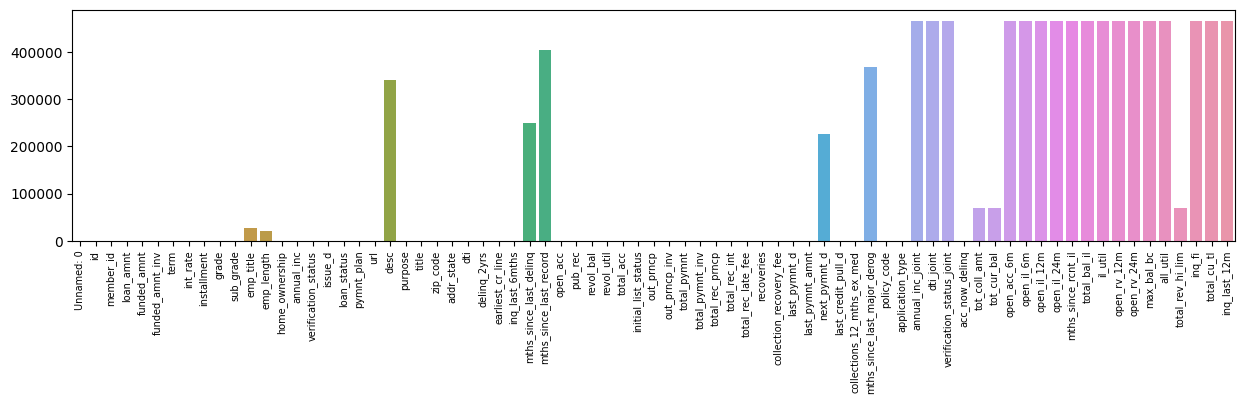

In [43]:
#Before Drop
plt.figure(figsize=(15,3))

sns.barplot(
    x = data.columns,
    y = data.isna().sum(),
)

plt.xticks(rotation = 90, fontsize=7)

plt.show()

In [44]:
data.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], inplace=True, axis=1)

In [45]:
data.drop(data.iloc[:, 52:63], axis=1, inplace=True)

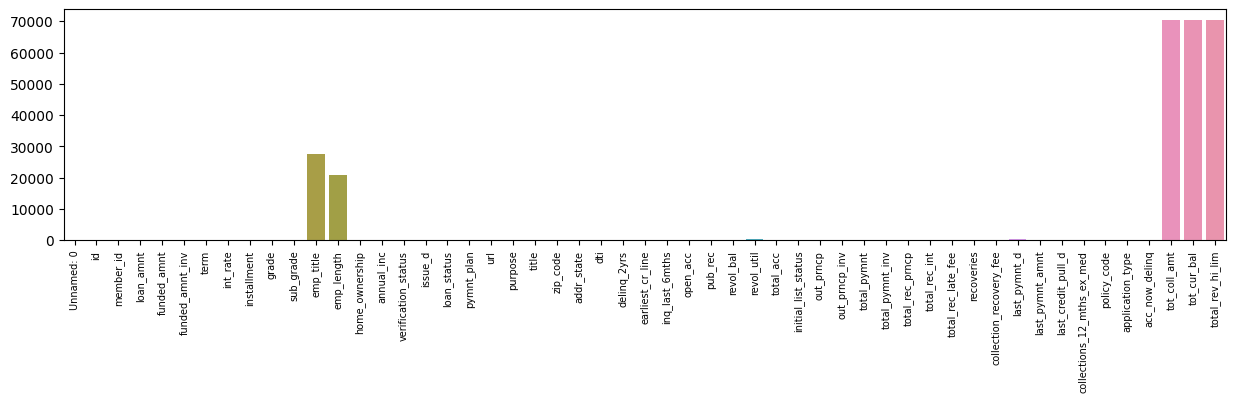

In [46]:
#After Drop
plt.figure(figsize=(15,3))

sns.barplot(
    x = data.columns,
    y = data.isna().sum(),
)

plt.xticks(rotation = 90, fontsize=7)

plt.show()

#### Drop Some Unneeded Columns

In [47]:
data.drop(['Unnamed: 0','id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'sub_grade', 'emp_title', 'issue_d', 'pymnt_plan', 'url', 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt'], inplace=True, axis=1)

In [48]:
data.shape

(466285, 30)

#### Change the Loan Status for only 2 categories

In [49]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [50]:
newdata = data.loc[(data['loan_status'] == 'Fully Paid') ^ (data['loan_status'] == 'Charged Off')].copy()

#### Separate Data based on Categorical and Numerical

In [51]:
categorical_data = newdata[['term', 'loan_status', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_credit_pull_d', 'application_type']]
categorical_data

,term,loan_status,grade,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d,application_type
0,36 months,Fully Paid,B,10+ years,RENT,Verified,credit_card,Computer,AZ,Jan-85,f,Jan-16,INDIVIDUAL
1,60 months,Charged Off,C,< 1 year,RENT,Source Verified,car,bike,GA,Apr-99,f,Sep-13,INDIVIDUAL
2,36 months,Fully Paid,C,10+ years,RENT,Not Verified,small_business,real estate business,IL,Nov-01,f,Jan-16,INDIVIDUAL
3,36 months,Fully Paid,C,10+ years,RENT,Source Verified,other,personel,CA,Feb-96,f,Jan-15,INDIVIDUAL
5,36 months,Fully Paid,A,3 years,RENT,Source Verified,wedding,My wedding loan I promise to pay back,AZ,Nov-04,f,Sep-15,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,60 months,Charged Off,D,5 years,MORTGAGE,Verified,medical,Medical expenses,MA,Nov-94,f,Oct-14,INDIVIDUAL
466277,36 months,Charged Off,A,3 years,RENT,Verified,debt_consolidation,my loan,MD,Jul-98,f,Oct-14,INDIVIDUAL
466278,36 months,Fully Paid,D,10+ years,RENT,Source Verified,vacation,Vacation,VA,Jun-02,f,Jan-16,INDIVIDUAL
466281,60 months,Charged Off,D,10+ years,MORTGAGE,Verified,debt_consolidation,Debt consolidation,TN,Jun-97,f,Jan-16,INDIVIDUAL


In [52]:
numerical_data = newdata[['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]
numerical_data

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,1,0.0,NaN,NaN,NaN
1,2500,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,1,0.0,NaN,NaN,NaN
2,2400,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,1,0.0,NaN,NaN,NaN
3,10000,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,1,0.0,NaN,NaN,NaN
5,5000,156.46,36000.0,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,0.0,1,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,217.65,37536.0,12.28,4.0,0.0,12.0,0.0,5318,10.7,26.0,0.0,1,0.0,0.0,116995.0,49800.0
466277,18000,563.23,90000.0,10.33,1.0,0.0,16.0,0.0,8224,16.3,33.0,0.0,1,0.0,0.0,42592.0,50300.0
466278,10000,362.78,42000.0,11.57,0.0,0.0,9.0,0.0,3196,28.8,24.0,0.0,1,0.0,0.0,10170.0,11100.0
466281,22000,582.50,78000.0,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,0.0,1,0.0,0.0,221830.0,39400.0


#### See the info with Statistic Descriptive

In [53]:
numerical_data.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,227214.000000,227214.000000,2.272140e+05,227214.000000,227214.000000,227214.000000,227214.000000,227214.000000,2.272140e+05,227028.000000,227214.000000,227158.000000,227214.0,227214.000000,1.635060e+05,1.635060e+05,1.635060e+05
mean,13458.229907,416.489963,7.203479e+04,16.364585,0.242784,0.868366,10.832713,0.132919,1.507319e+04,54.841070,24.814026,0.005754,1.0,0.002786,2.013899e+02,1.373521e+05,2.924175e+04
std,8046.090690,243.507008,5.529133e+04,7.669631,0.722587,1.075448,4.798421,0.418090,1.812469e+04,24.693604,11.620662,0.082430,0.0,0.057577,2.269355e+04,1.508180e+05,2.867860e+04
min,500.000000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,7200.000000,239.100000,4.500000e+04,10.660000,0.000000,0.000000,7.000000,0.000000,5.929000e+03,37.000000,16.000000,0.000000,1.0,0.000000,0.000000e+00,2.801825e+04,1.328775e+04
50%,12000.000000,365.010000,6.200000e+04,16.050000,0.000000,1.000000,10.000000,0.000000,1.100000e+04,56.500000,23.000000,0.000000,1.0,0.000000,0.000000e+00,8.046050e+04,2.210000e+04
75%,18000.000000,545.160000,8.600000e+04,21.790000,0.000000,1.000000,13.000000,0.000000,1.904700e+04,74.300000,32.000000,0.000000,1.0,0.000000,0.000000e+00,2.076438e+05,3.640000e+04
max,35000.000000,1408.130000,7.141778e+06,39.990000,29.000000,8.000000,76.000000,11.000000,1.746716e+06,892.300000,150.000000,6.000000,1.0,5.000000,9.152545e+06,8.000078e+06,2.013133e+06


#### Fill the NaN value in Columns

In [54]:
# For Numerical Data
meanNewData = newdata.iloc[:, 27:].fillna(newdata.iloc[:, 27:].mean())
newdata.iloc[:, 27:] = meanNewData

In [55]:
meanNewData2 = newdata[['revol_util', 'collections_12_mths_ex_med']].fillna(newdata[['revol_util', 'collections_12_mths_ex_med']].mean())
newdata[['revol_util', 'collections_12_mths_ex_med']] = meanNewData2

In [56]:
# For Categorical Data
modeNewData = newdata[['emp_length', 'title', 'last_credit_pull_d']].fillna('unknown')
newdata[['emp_length', 'title', 'last_credit_pull_d']] = modeNewData

newdata.isna().sum()

loan_amnt                     0
term                          0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
last_credit_pull_d            0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

Save the updated dataframe to excel for analysis on PowerBI

In [57]:
# newdata.to_excel("loandata_analysis.xlsx", index=False)

## Exploratory Data Analysis

Correlation in Columns

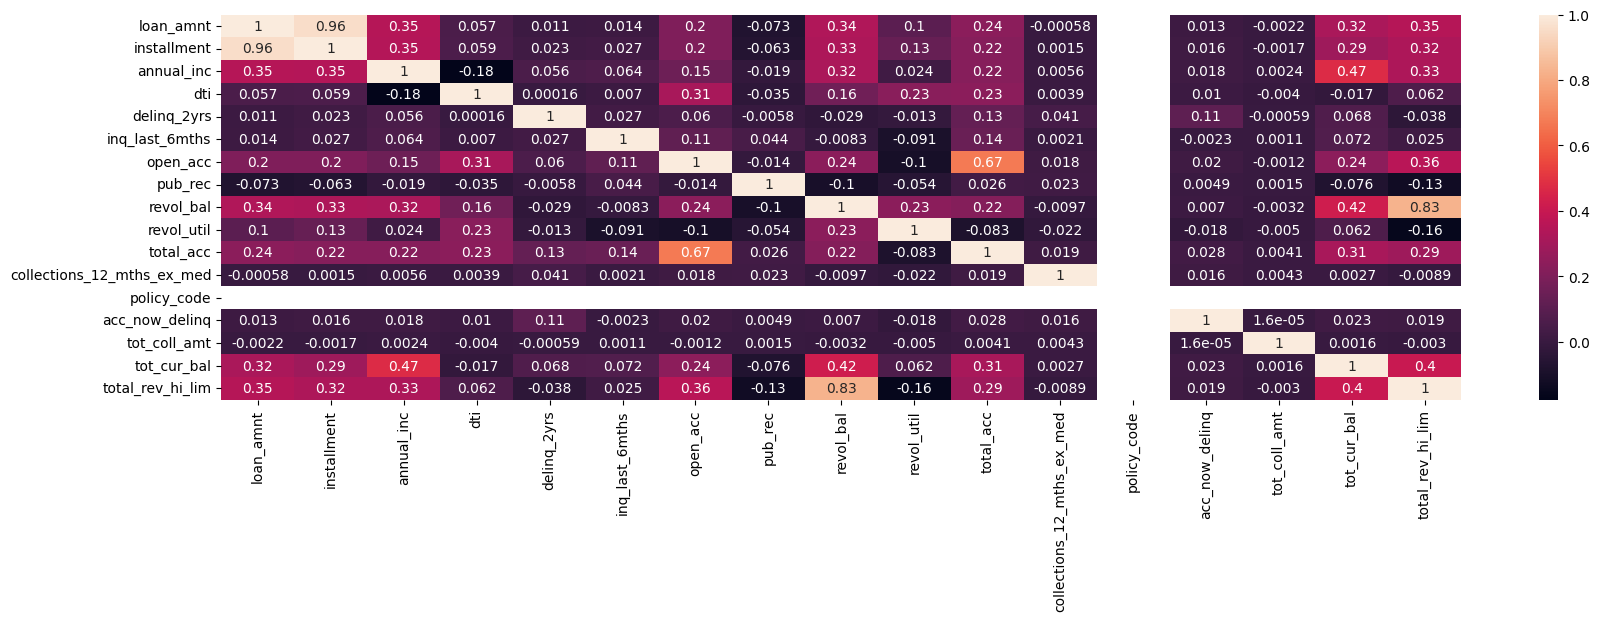

In [58]:
plt.figure(figsize=(20, 5))

sns.heatmap(
    numerical_data.corr(),
    annot=True,
)

plt.show()

For Data Visualization to Exploratory Data Analysis, done on the PowerBI application

## Data Pre-processing 2

#### Clear the outlier

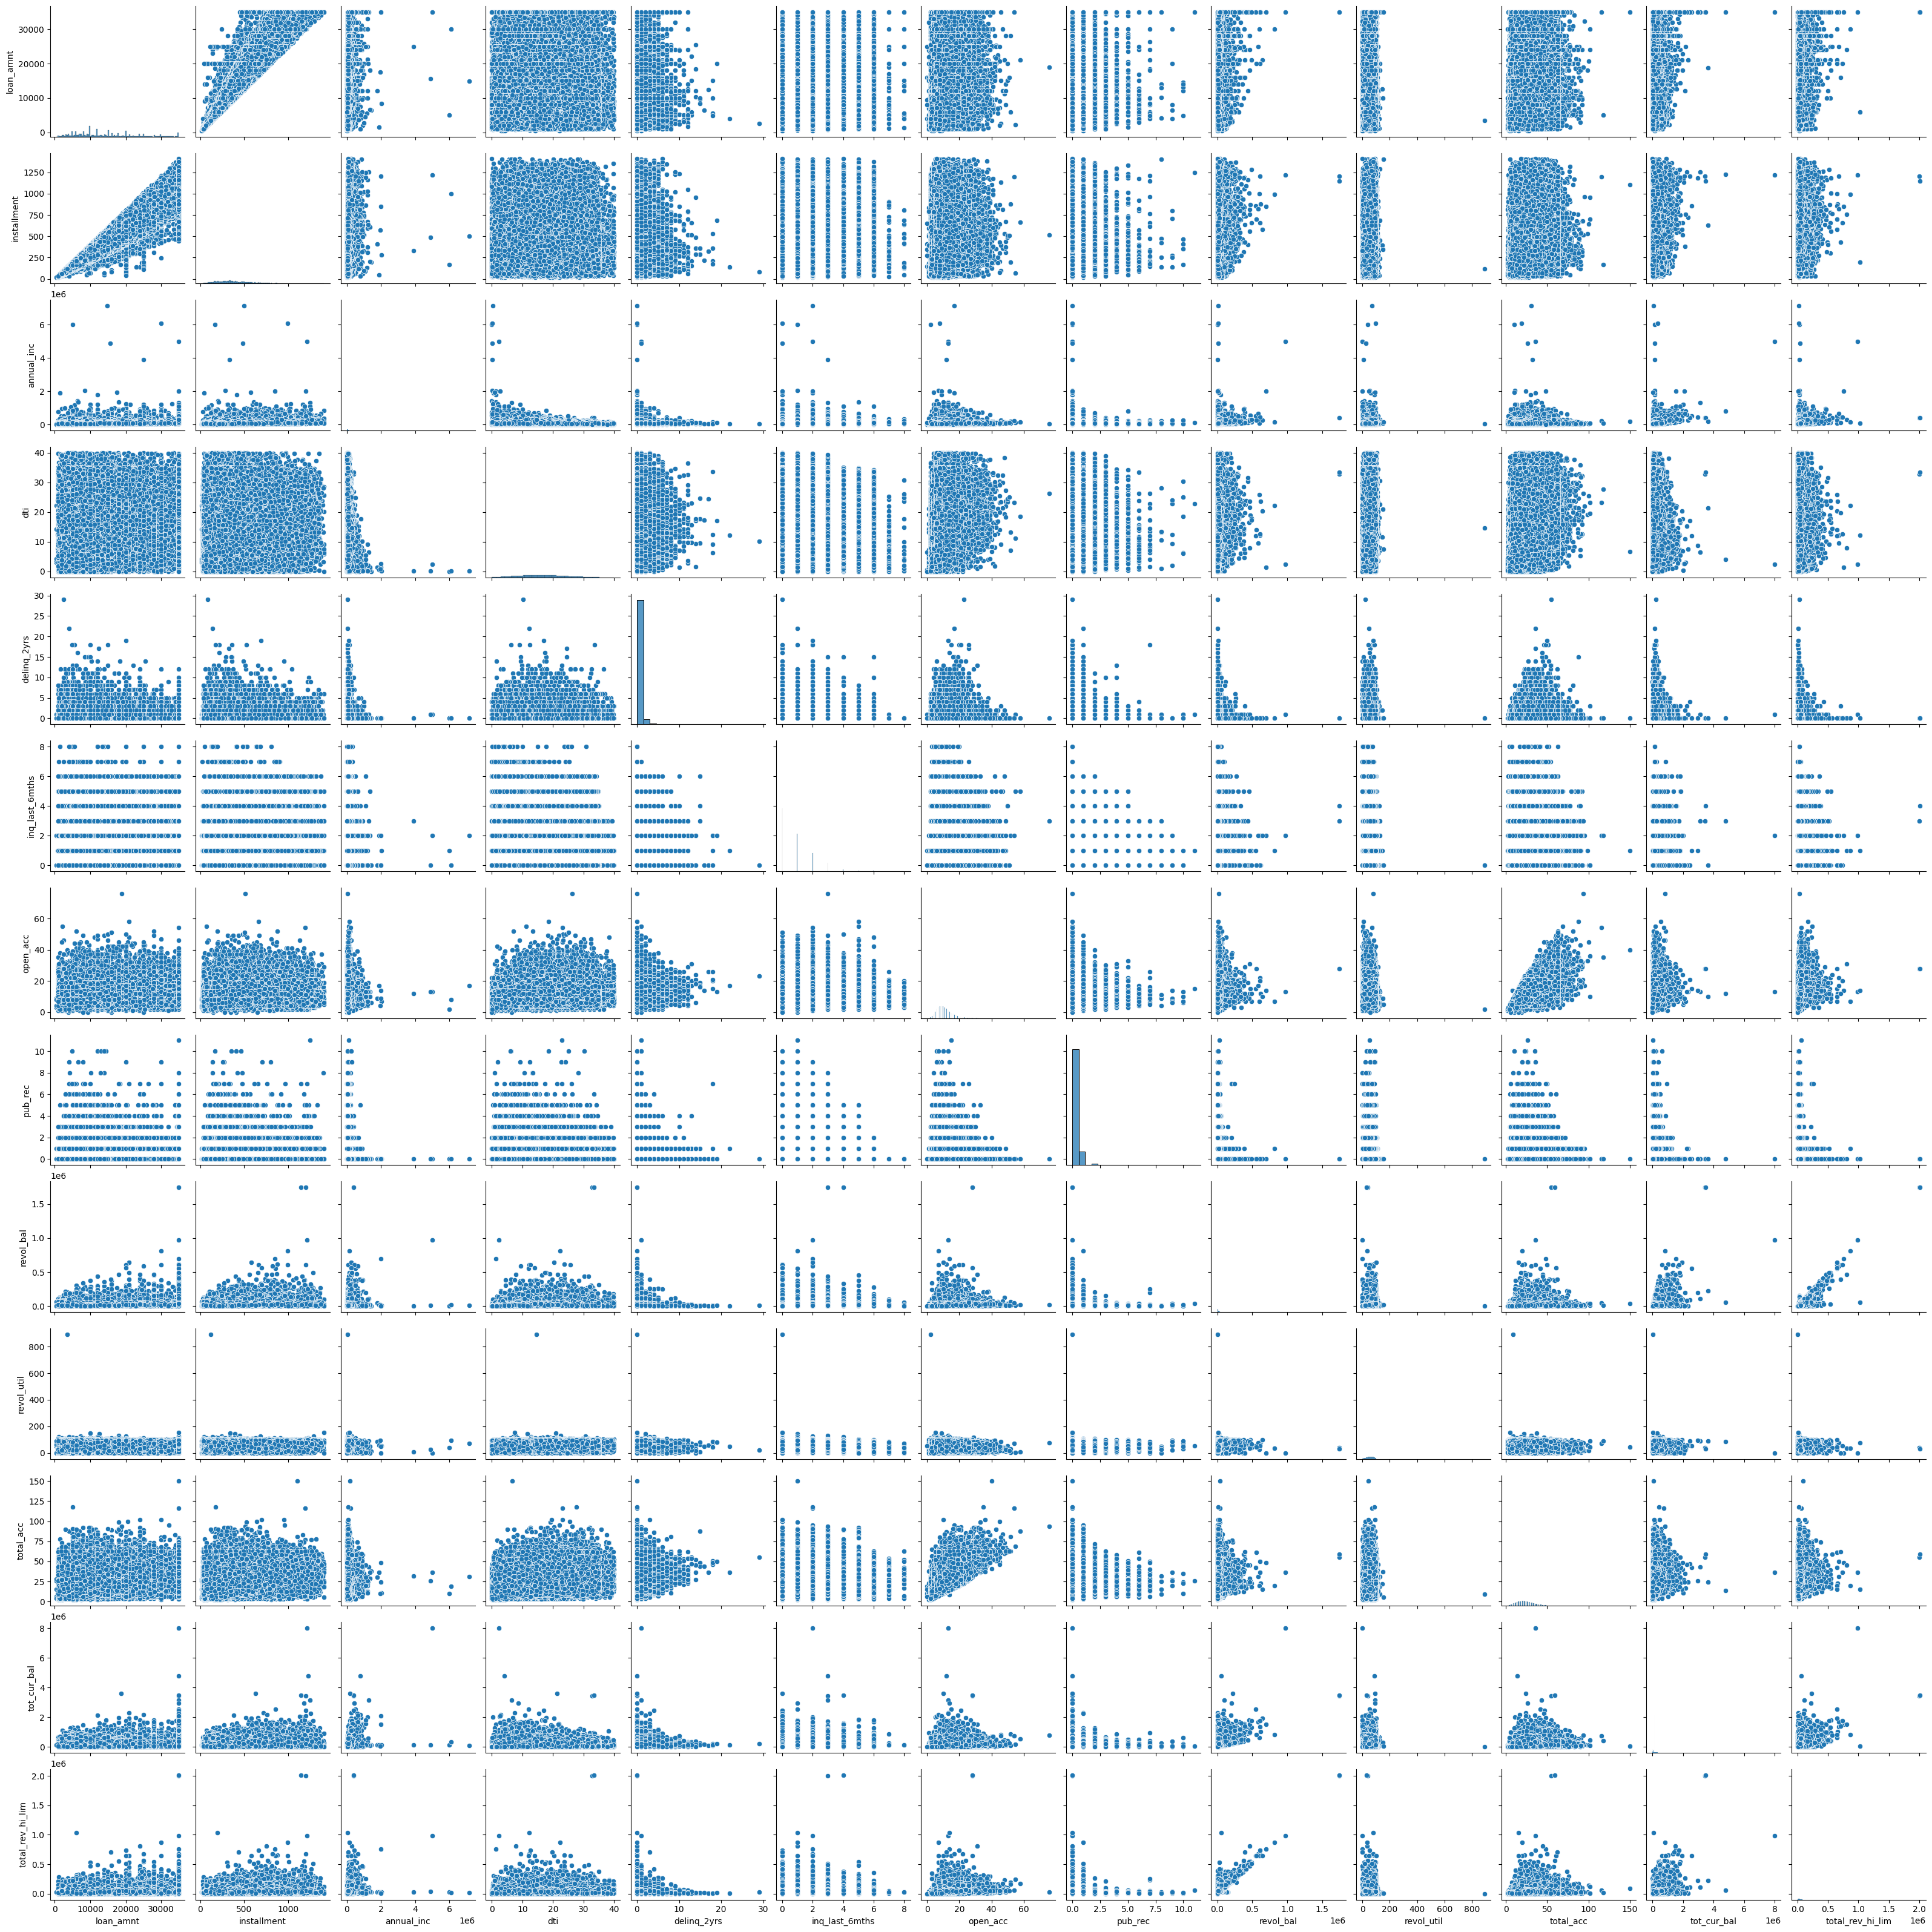

In [59]:
# Visualize the data to see the outlier
sns.pairplot(
    newdata,
    vars = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'tot_cur_bal', 'total_rev_hi_lim']
)

plt.show()

In [60]:
newdata = newdata[newdata['delinq_2yrs'] < 20]

In [61]:
newdata = newdata[newdata['open_acc'] < 60]

In [62]:
newdata = newdata[newdata['total_acc'] < 120]

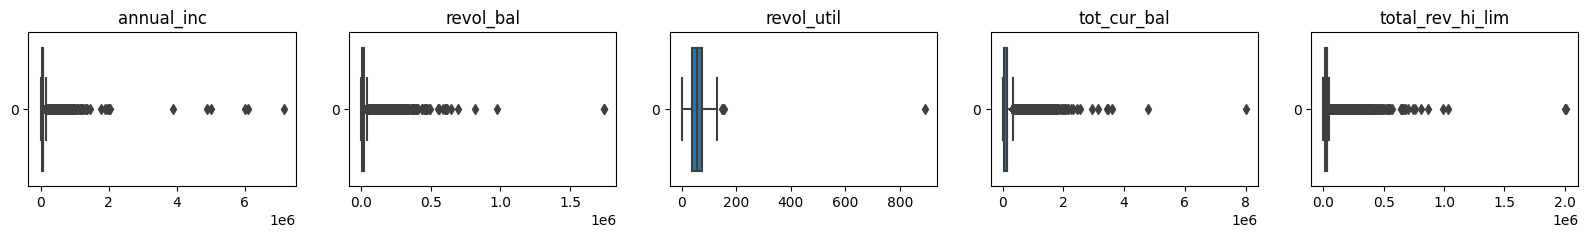

In [63]:
# Another Outlier 
fig, axes = plt.subplots(1, 5, figsize=(20, 2))

sns.boxplot(newdata['annual_inc'], ax=axes[0] , orient='h').set(title='annual_inc')
sns.boxplot(newdata['revol_bal'], ax=axes[1] , orient='h').set(title='revol_bal')
sns.boxplot(newdata['revol_util'], ax=axes[2], orient='h').set(title='revol_util')
sns.boxplot(newdata['tot_cur_bal'], ax=axes[3], orient='h').set(title='tot_cur_bal')
sns.boxplot(newdata['total_rev_hi_lim'], ax=axes[4], orient='h').set(title='total_rev_hi_lim')

plt.show()


In [64]:
dataOutlier2 = np.array([newdata['revol_bal'], newdata['tot_cur_bal'], newdata['total_rev_hi_lim']])

for i in dataOutlier2[:]:
    Q1 = np.percentile(i, 25)
    Q3 = np.percentile(i, 75)

    IQR = Q3-Q1

    lower_limit = i <= (Q1 - 1.5*IQR)
    upper_limit = i >= (Q3 + 1.5*IQR)

newdata[lower_limit]
newdata[upper_limit]

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42546,28000,36 months,872.52,A,5 years,MORTGAGE,325000.0,Source Verified,Fully Paid,debt_consolidation,Pay off other Installment loan,CA,18.55,0.0,Nov-94,1.0,15.0,0.0,29581,54.6,31.0,w,Aug-14,0.0,1,INDIVIDUAL,0.0,0.0,799592.0,54200.0
42573,16000,36 months,498.59,A,< 1 year,MORTGAGE,112000.0,Not Verified,Fully Paid,debt_consolidation,Debt Consolidation,MA,7.39,0.0,Dec-98,1.0,12.0,0.0,6868,10.3,19.0,w,Mar-15,0.0,1,INDIVIDUAL,0.0,0.0,369614.0,66800.0
42592,4500,36 months,144.51,B,< 1 year,MORTGAGE,38000.0,Not Verified,Fully Paid,debt_consolidation,Paying It Off!,MN,20.02,0.0,Oct-02,2.0,14.0,0.0,7622,10.8,31.0,w,Mar-14,0.0,1,INDIVIDUAL,0.0,0.0,29848.0,70900.0
42601,14000,36 months,444.55,A,10+ years,MORTGAGE,74628.0,Verified,Fully Paid,debt_consolidation,Debt Consolidation,TX,25.92,0.0,Jul-89,4.0,20.0,0.0,10261,13.9,52.0,f,Oct-15,0.0,1,INDIVIDUAL,0.0,0.0,222056.0,73900.0
42602,13000,36 months,417.47,B,10+ years,MORTGAGE,102120.0,Not Verified,Fully Paid,home_improvement,Metal roof project,TX,15.85,1.0,Jan-89,2.0,12.0,0.0,17980,34.8,36.0,w,Jan-16,0.0,1,INDIVIDUAL,0.0,126.0,222639.0,51600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466226,35000,36 months,1162.34,B,10+ years,MORTGAGE,180000.0,Source Verified,Fully Paid,debt_consolidation,debt consolidation,NY,14.02,0.0,Sep-91,1.0,18.0,0.0,35774,63.3,32.0,f,Oct-15,0.0,1,INDIVIDUAL,0.0,0.0,521411.0,56500.0
466255,35000,36 months,1269.73,D,9 years,MORTGAGE,284481.0,Source Verified,Fully Paid,small_business,Business Loan,IL,14.59,0.0,Sep-00,1.0,19.0,0.0,119663,65.0,35.0,f,Aug-15,0.0,1,INDIVIDUAL,0.0,0.0,383345.0,153800.0
466276,8525,60 months,217.65,D,5 years,MORTGAGE,37536.0,Verified,Charged Off,medical,Medical expenses,MA,12.28,4.0,Nov-94,0.0,12.0,0.0,5318,10.7,26.0,f,Oct-14,0.0,1,INDIVIDUAL,0.0,0.0,116995.0,49800.0
466277,18000,36 months,563.23,A,3 years,RENT,90000.0,Verified,Charged Off,debt_consolidation,my loan,MD,10.33,1.0,Jul-98,0.0,16.0,0.0,8224,16.3,33.0,f,Oct-14,0.0,1,INDIVIDUAL,0.0,0.0,42592.0,50300.0


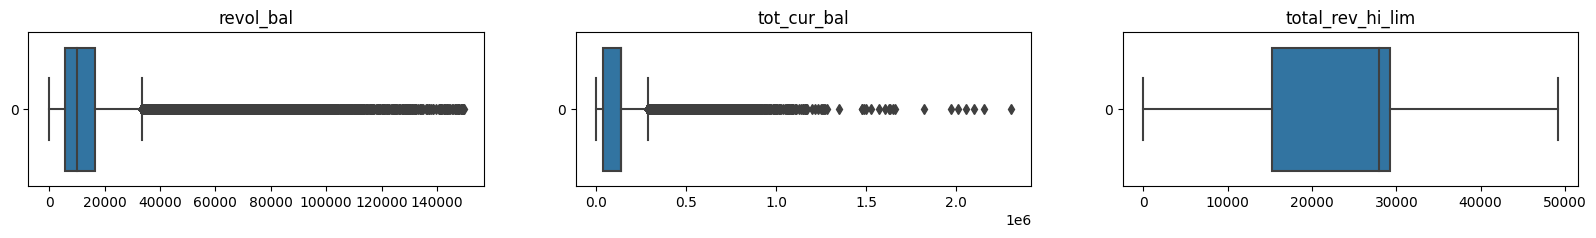

In [65]:
# Clean Outlier revol_bal, tot_cur_bal, total_rev_hi_lim

clearOutlier = newdata[~lower_limit & ~upper_limit]

# After Clean the Outlier 
fig, axes = plt.subplots(1, 3, figsize=(20, 2))

sns.boxplot(clearOutlier['revol_bal'], ax=axes[0] , orient='h').set(title='revol_bal')
sns.boxplot(clearOutlier['tot_cur_bal'], ax=axes[1], orient='h').set(title='tot_cur_bal')
sns.boxplot(clearOutlier['total_rev_hi_lim'], ax=axes[2], orient='h').set(title='total_rev_hi_lim') 

plt.show()

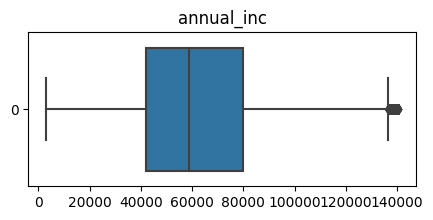

In [66]:
# Clean Outlier annual_inc
Q1 = np.percentile(clearOutlier['annual_inc'], 25)
Q3 = np.percentile(clearOutlier['annual_inc'], 75)

IQR = Q3-Q1

lower_limit = clearOutlier['annual_inc'] <= (Q1 - 1.5*IQR)
upper_limit = clearOutlier['annual_inc'] >= (Q3 + 1.5*IQR)

clearOutlier[lower_limit]
clearOutlier[upper_limit]

clearOutlier = clearOutlier[~lower_limit & ~upper_limit]

# After Clean the Outlier 
fig, axes = plt.subplots(figsize=(5, 2))

sns.boxplot(clearOutlier['annual_inc'], orient='h').set(title='annual_inc')

plt.show()

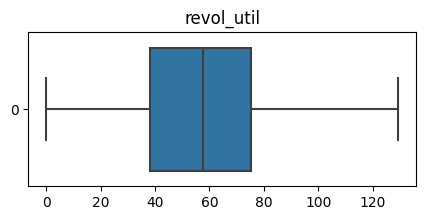

In [67]:
# Clean Outlier revol_util

Q1 = np.percentile(clearOutlier['revol_util'], 25)
Q3 = np.percentile(clearOutlier['revol_util'], 75)

IQR = Q3-Q1

lower_limit = clearOutlier['revol_util'] <= (Q1 - 1.5*IQR)
upper_limit = clearOutlier['revol_util'] >= (Q3 + 1.5*IQR)

clearOutlier[lower_limit]
clearOutlier[upper_limit]

clearOutlier = clearOutlier[~lower_limit & ~upper_limit]

# After Clean the Outlier 
fig, axes = plt.subplots(figsize=(5, 2))

sns.boxplot(clearOutlier['revol_util'], orient='h').set(title='revol_util')

plt.show()

In [68]:
# Update the data in newdata

newdata = clearOutlier
newdata.shape

(196415, 30)

In [69]:
newdata.head(2)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,Jan-16,0.0,1,INDIVIDUAL,0.0,201.389851,137352.137175,29241.745349
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,Sep-13,0.0,1,INDIVIDUAL,0.0,201.389851,137352.137175,29241.745349


### Transformation Data (Normalization & Encoding Categorical Data)

In [70]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

numericforNorm = newdata[['loan_amnt', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]

normalization = MinMaxScaler()
normalization.fit(numericforNorm)

newdata[['loan_amnt', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']] = normalization.transform(numericforNorm)

In [71]:
# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
label_E = LabelEncoder()

categoricalEnc = newdata[['term', 'loan_status', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_credit_pull_d', 'application_type']]

newdata[['term', 'loan_status', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_credit_pull_d', 'application_type']] = categoricalEnc.apply(label_E.fit_transform)

See the loan status encoding result

In [72]:
newdata['loan_status'].value_counts()
# 1 for Fully Paid
# 0 for Charged Off

1    158471
0     37944
Name: loan_status, dtype: int64

In [73]:
# After Transformation Data
newdata.head(3)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.130435,0,0.105699,1,1,5,0.152729,2,1,1,6134,3,0.691423,0.0,241,1.0,0.061224,0.0,0.091597,0.646832,0.060345,0,41,0.0,1,0,0.0,0.000022,0.09308,0.595106
1,0.057971,1,0.031700,2,10,5,0.196366,1,0,0,34645,10,0.025006,0.0,47,5.0,0.061224,0.0,0.011322,0.072643,0.017241,0,98,0.0,1,0,0.0,0.000022,0.09308,0.595106
2,0.055072,0,0.049295,2,1,5,0.067288,0,1,11,42009,14,0.218055,0.0,460,2.0,0.040816,0.0,0.019839,0.761206,0.068966,0,41,0.0,1,0,0.0,0.000022,0.09308,0.595106


### Choose Features and Target

In [74]:
# Features
x = newdata.drop('loan_status', axis=1)

# Target
y = newdata['loan_status']

### Training & Test Set

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Modelling

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay

# Logistic Regression
logReg = LogisticRegression(random_state=42)
logReg.fit(x_train, y_train)
y_logPred = logReg.predict(x_test)

# Evaluation Model
print("Logistic Regression : ")
print("Precision Score : ", '{:.1%}'.format(precision_score(y_test, y_logPred)))
print("Recall Score : ", '{:.1%}'.format(recall_score(y_test, y_logPred)))
print("f1 Score : ", '{:.1%}'.format(f1_score(y_test, y_logPred)))

Logistic Regression : 
Precision Score :  80.7%
Recall Score :  100.0%
f1 Score :  89.3%


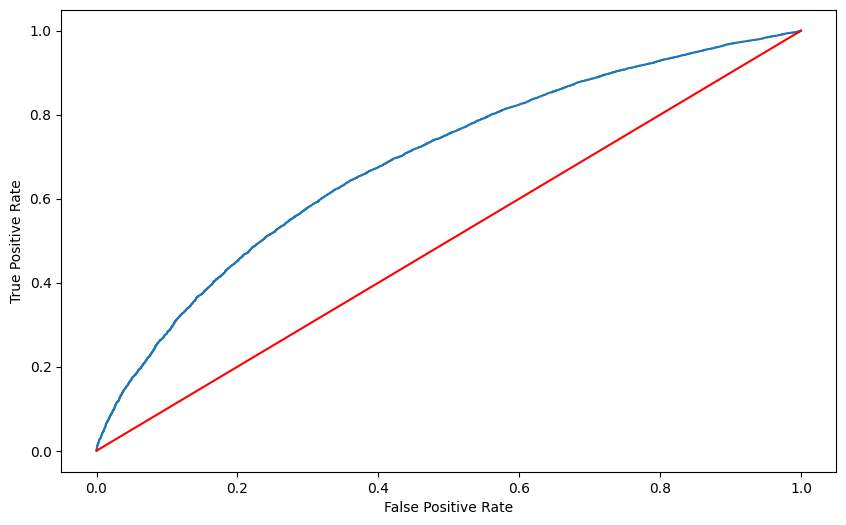

In [77]:
from sklearn.naive_bayes import GaussianNB

def rocCurve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(10,6)
    plt.plot(
        [0,1],
        [0,1],
        color ='red'
    )

# Visualization roc_curve
model = GaussianNB()
model.fit(x_train, y_train)
y_proba = model.predict_proba(x_test)

rocCurve(y_test, y_proba[:, 1])

### Save Model

In [79]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)